In [39]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

def price(sym, comp_sym, all_data=False, limit=100, aggregate=1, exchange='', timeframe='histominute'):
    url = 'https://min-api.cryptocompare.com/data/{}?fsym={}&tsym={}&limit={}&aggregate={}' \
            .format(timeframe,sym.upper(),comp_sym.upper(),limit,aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

def plotGraph(symbol, comp_sym, all_data=True, limit=1, aggregate=1, exchange=''):
        print('Request Initiated ...')
        data = daily_price_historical(symbol, comp_sym, all_data=True, limit=1, aggregate=1, exchange='')
        print('Data Received, Ploting into a graph ...')
        fg = plt.figure(figsize=(20, 10))
        plt.plot(data.timestamp, data.high)
        plt.title(symbol + ' To ' + comp_sym, fontsize=24)
        plt.ylabel('Price In ' + comp_sym, fontsize=18)
        plt.xlabel('Year', fontsize=18)
        plt.show()

Request Initiated ...
Data Received, Ploting into a graph ...


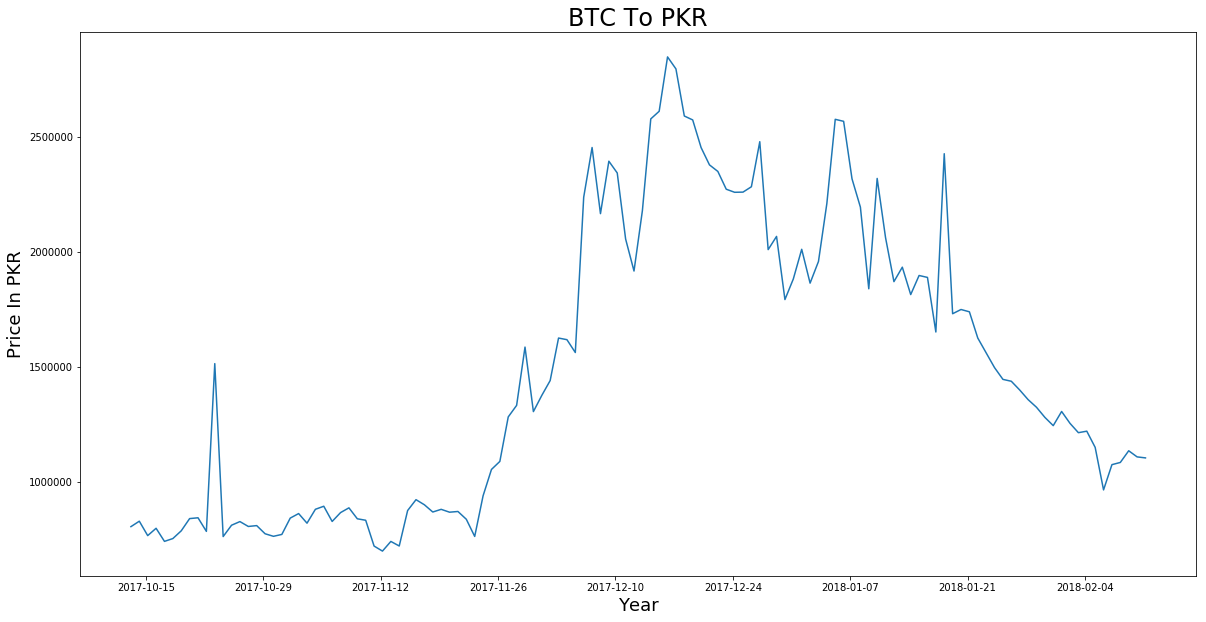

In [41]:
plotGraph('BTC', 'PKR', all_data=True)